# Lego Database
Preguntas a responder:
- ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?
- ¿Existe alguna asociación entre los colores y las temáticas?
- ¿Podría predecir a que temática pertenece un set basado en el
contenido de este?
- A través de los años, ¿Cuál o cuáles son los sets que tienen las piezas más
raras?
- ¿Cómo evolucionaron los colores en los sets de lego a través de los
años?

Dataset schema:

![dataset-schema](./imgs/downloads_schema.png)

In [3]:
# Dependencies
import matplotlib.pyplot as plt
from matplotlib import figure
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from ipywidgets import IntProgress
from IPython.display import display

# Global vars
DATASET_PATH = "./data/"

## Exploración y comprensión de los datos:
- Cargar el dataset proporcionado y realizar un análisis exploratorio de los datos.

### Información útil para la comprensión de los datos
- ¿Qué es un *inventory*?

De discusión en Kaggle:

> The documentation of the original dataset isn't explicit about this, but I believe that the inventories are the smaller bags of parts that come with LEGO sets (like so: https://farm1.staticflickr.com/345/20189671015_87a07e2c51.jpg). So each set has a number of inventories within it, and each inventory has a given assortment of parts in it. But each inventory might also be used with multiple sets, which I think is why the set_num (the key to the specific set) is not unique. I think the different versions reflect whether there were changes to the parts in a given inventory when it was republished, like a different number of bricks or if some bricks were a different color.

#### Inventory parts
This table contains information part inventories, including a unique ID number, the part number, the color of the part, how many are included and whether it's a spare.

In [4]:
inventory_parts_df = pd.read_csv(DATASET_PATH + "inventory_parts.csv")
print("is_spare possible values:", inventory_parts_df["is_spare"].unique())
inventory_parts_df.is_spare = inventory_parts_df.is_spare.map(lambda x: x == "t")
print("Amount of entries in inventory parts:", len(inventory_parts_df))
inventory_parts_df.head()

is_spare possible values: ['f' 't']
Amount of entries in inventory parts: 580251


,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,False
1,1,48395,7,1,False
2,1,mcsport6,25,1,False
3,1,paddle,0,1,False
4,3,11816pr0005,78,1,False


In [5]:
inventory_sets_df = pd.read_csv(DATASET_PATH + "inventory_sets.csv")
print("Amount of entries in inventory sets:", len(inventory_sets_df))
inventory_sets_df.head()

Amount of entries in inventory sets: 2846


,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [6]:
colors_df = pd.read_csv(DATASET_PATH + "colors.csv")
colors_df.is_trans = colors_df.is_trans.map(lambda x: x == "t")
colors_df.rename(
    columns={col_label: "color_" + col_label for col_label in colors_df}, inplace=True
)
print("Amount of entries in colors:", len(colors_df))
colors_df.head()

Amount of entries in colors: 135


,color_id,color_name,color_rgb,color_is_trans
0,-1,Unknown,0033B2,False
1,0,Black,05131D,False
2,1,Blue,0055BF,False
3,2,Green,237841,False
4,3,Dark Turquoise,008F9B,False


Inventory parts and color dataframes composition

In [7]:
inventory_parts_df = pd.merge(inventory_parts_df, colors_df, on="color_id")
inventory_parts_df.head()

,inventory_id,part_num,color_id,quantity,is_spare,color_name,color_rgb,color_is_trans
0,1,48379c01,72,1,False,Dark Bluish Gray,6C6E68,False
1,1,48395,7,1,False,Light Gray,9BA19D,False
2,1,mcsport6,25,1,False,Orange,FE8A18,False
3,1,paddle,0,1,False,Black,05131D,False
4,3,11816pr0005,78,1,False,Light Flesh,F6D7B3,False


The following table contains information on inventories, including a unique ID, it's version and the set number.

Se puede observar que hay sets que contienen más de un inventario.

In [8]:
inventories_df = pd.read_csv(DATASET_PATH + "inventories.csv")
inventories_df.rename(
    columns={"id": "inventory_id", "version": "inventory_version"}, inplace=True
)
print("Amount of entries in inventories:", len(inventories_df))
print("Amount of unique sets:", len(inventories_df.set_num.unique()))
inventories_df.head()

Amount of entries in inventories: 11681
Amount of unique sets: 11670


,inventory_id,inventory_version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


The following table includes information on lego themes. Each theme is given a unique ID number, a name, and (if it's part of a bigger theme) which theme it's part of.

In [9]:
themes_df = pd.read_csv(DATASET_PATH + "themes.csv")
print("Amount of entries in themes:", len(themes_df))
themes_df.rename(
    columns={"id": "theme_id", "name": "theme_name", "parent_id": "theme_parent_id"},
    inplace=True,
)
themes_df.head()

Amount of entries in themes: 614


,theme_id,theme_name,theme_parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [10]:
sets_df = pd.read_csv(DATASET_PATH + "sets.csv")
sets_df = pd.merge(sets_df, themes_df, on="theme_id")
print("Amount of entries in sets:", len(sets_df))
sets_df.head()

Amount of entries in sets: 11673


,set_num,name,year,theme_id,num_parts,theme_name,theme_parent_id
0,00-1,Weetabix Castle,1970,414,471,Castle,411.0
1,0011-2,Town Mini-Figures,1978,84,12,Supplemental,67.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,Supplemental,126.0


In [8]:
df = pd.merge(inventories_df, sets_df, on="set_num")
df.head()

,inventory_id,inventory_version,set_num,name,year,theme_id,num_parts
0,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
1,3,1,3931-1,Emma's Splash Pool,2012,494,43
2,4,1,6942-1,Zo Weevil,1999,134,20
3,15,1,5158-1,"T-Junction, Circle Plates",1990,454,2
4,16,1,903-1,Train Wheels and Couplers,1969,371,10


In [9]:
new_df = pd.merge(inventory_parts_df, df, on="inventory_id")
new_df.head()

,inventory_id,part_num,color_id,quantity,is_spare,color_name,color_rgb,color_is_trans,inventory_version,set_num,name,year,theme_id,num_parts
0,1,48379c01,72,1,False,Dark Bluish Gray,6C6E68,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
1,1,48395,7,1,False,Light Gray,9BA19D,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
2,1,mcsport6,25,1,False,Orange,FE8A18,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
3,1,paddle,0,1,False,Black,05131D,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
4,3,11816pr0005,78,1,False,Light Flesh,F6D7B3,False,1,3931-1,Emma's Splash Pool,2012,494,43


In [10]:
new_new_df = pd.merge(new_df, themes_df, on="theme_id")
new_new_df.head()

NameError: name 'themes_df' is not defined

In [130]:
print(len(new_df))
print(len(new_df["part_num"].unique()))
print(len(new_df["year"].unique()))
print(new_df.year.unique())

580251
23131
66
[2004 2012 1999 1990 1969 2014 2002 2000 2016 1998 2006 1977 2003 1988
 2017 1995 2007 2010 2013 1986 1983 2005 2015 2001 1991 1966 2008 2011
 1962 1974 2009 1964 1987 1996 1985 1981 1984 1980 1994 1973 1976 1992
 1968 1997 1979 1958 1978 1975 1982 1970 1989 1972 1961 1967 1950 1993
 1955 1954 1956 1957 1971 1965 1963 1959 1960 1953]


In [135]:
DECADES_INITIAL_YEAR = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
DECADES_LABELS = ["50s", "60s", "70s", "80s", "90s", "00s", "10s"]
new_df["year_binned"] = pd.cut(
    new_df["year"], bins=DECADES_INITIAL_YEAR, labels=DECADES_LABELS
)
new_df.head()

,inventory_id,part_num,color_id,quantity,is_spare,color_name,color_rgb,color_is_trans,inventory_version,set_num,name,year,theme_id,num_parts,year_binned
0,1,48379c01,72,1,False,Dark Bluish Gray,6C6E68,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,00s
1,1,48395,7,1,False,Light Gray,9BA19D,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,00s
2,1,mcsport6,25,1,False,Orange,FE8A18,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,00s
3,1,paddle,0,1,False,Black,05131D,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,00s
4,3,11816pr0005,78,1,False,Light Flesh,F6D7B3,False,1,3931-1,Emma's Splash Pool,2012,494,43,10s


In [20]:
part_categories_df = pd.read_csv(DATASET_PATH + "part_categories.csv")
print("Amount of entries in part categories:", len(part_categories_df))
part_categories_df.head()

Amount of entries in part categories: 57


,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special


The following dataset includes information on lego parts, including a unique ID number, the name of the part, and what part category it's from.

In [11]:
parts_df = pd.read_csv(DATASET_PATH + "parts.csv")
print("Amount of entries in parts:", len(parts_df))
parts_df.head()

Amount of entries in parts: 25993


,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


### Evolución de los sets en tamaño a lo largo de los años

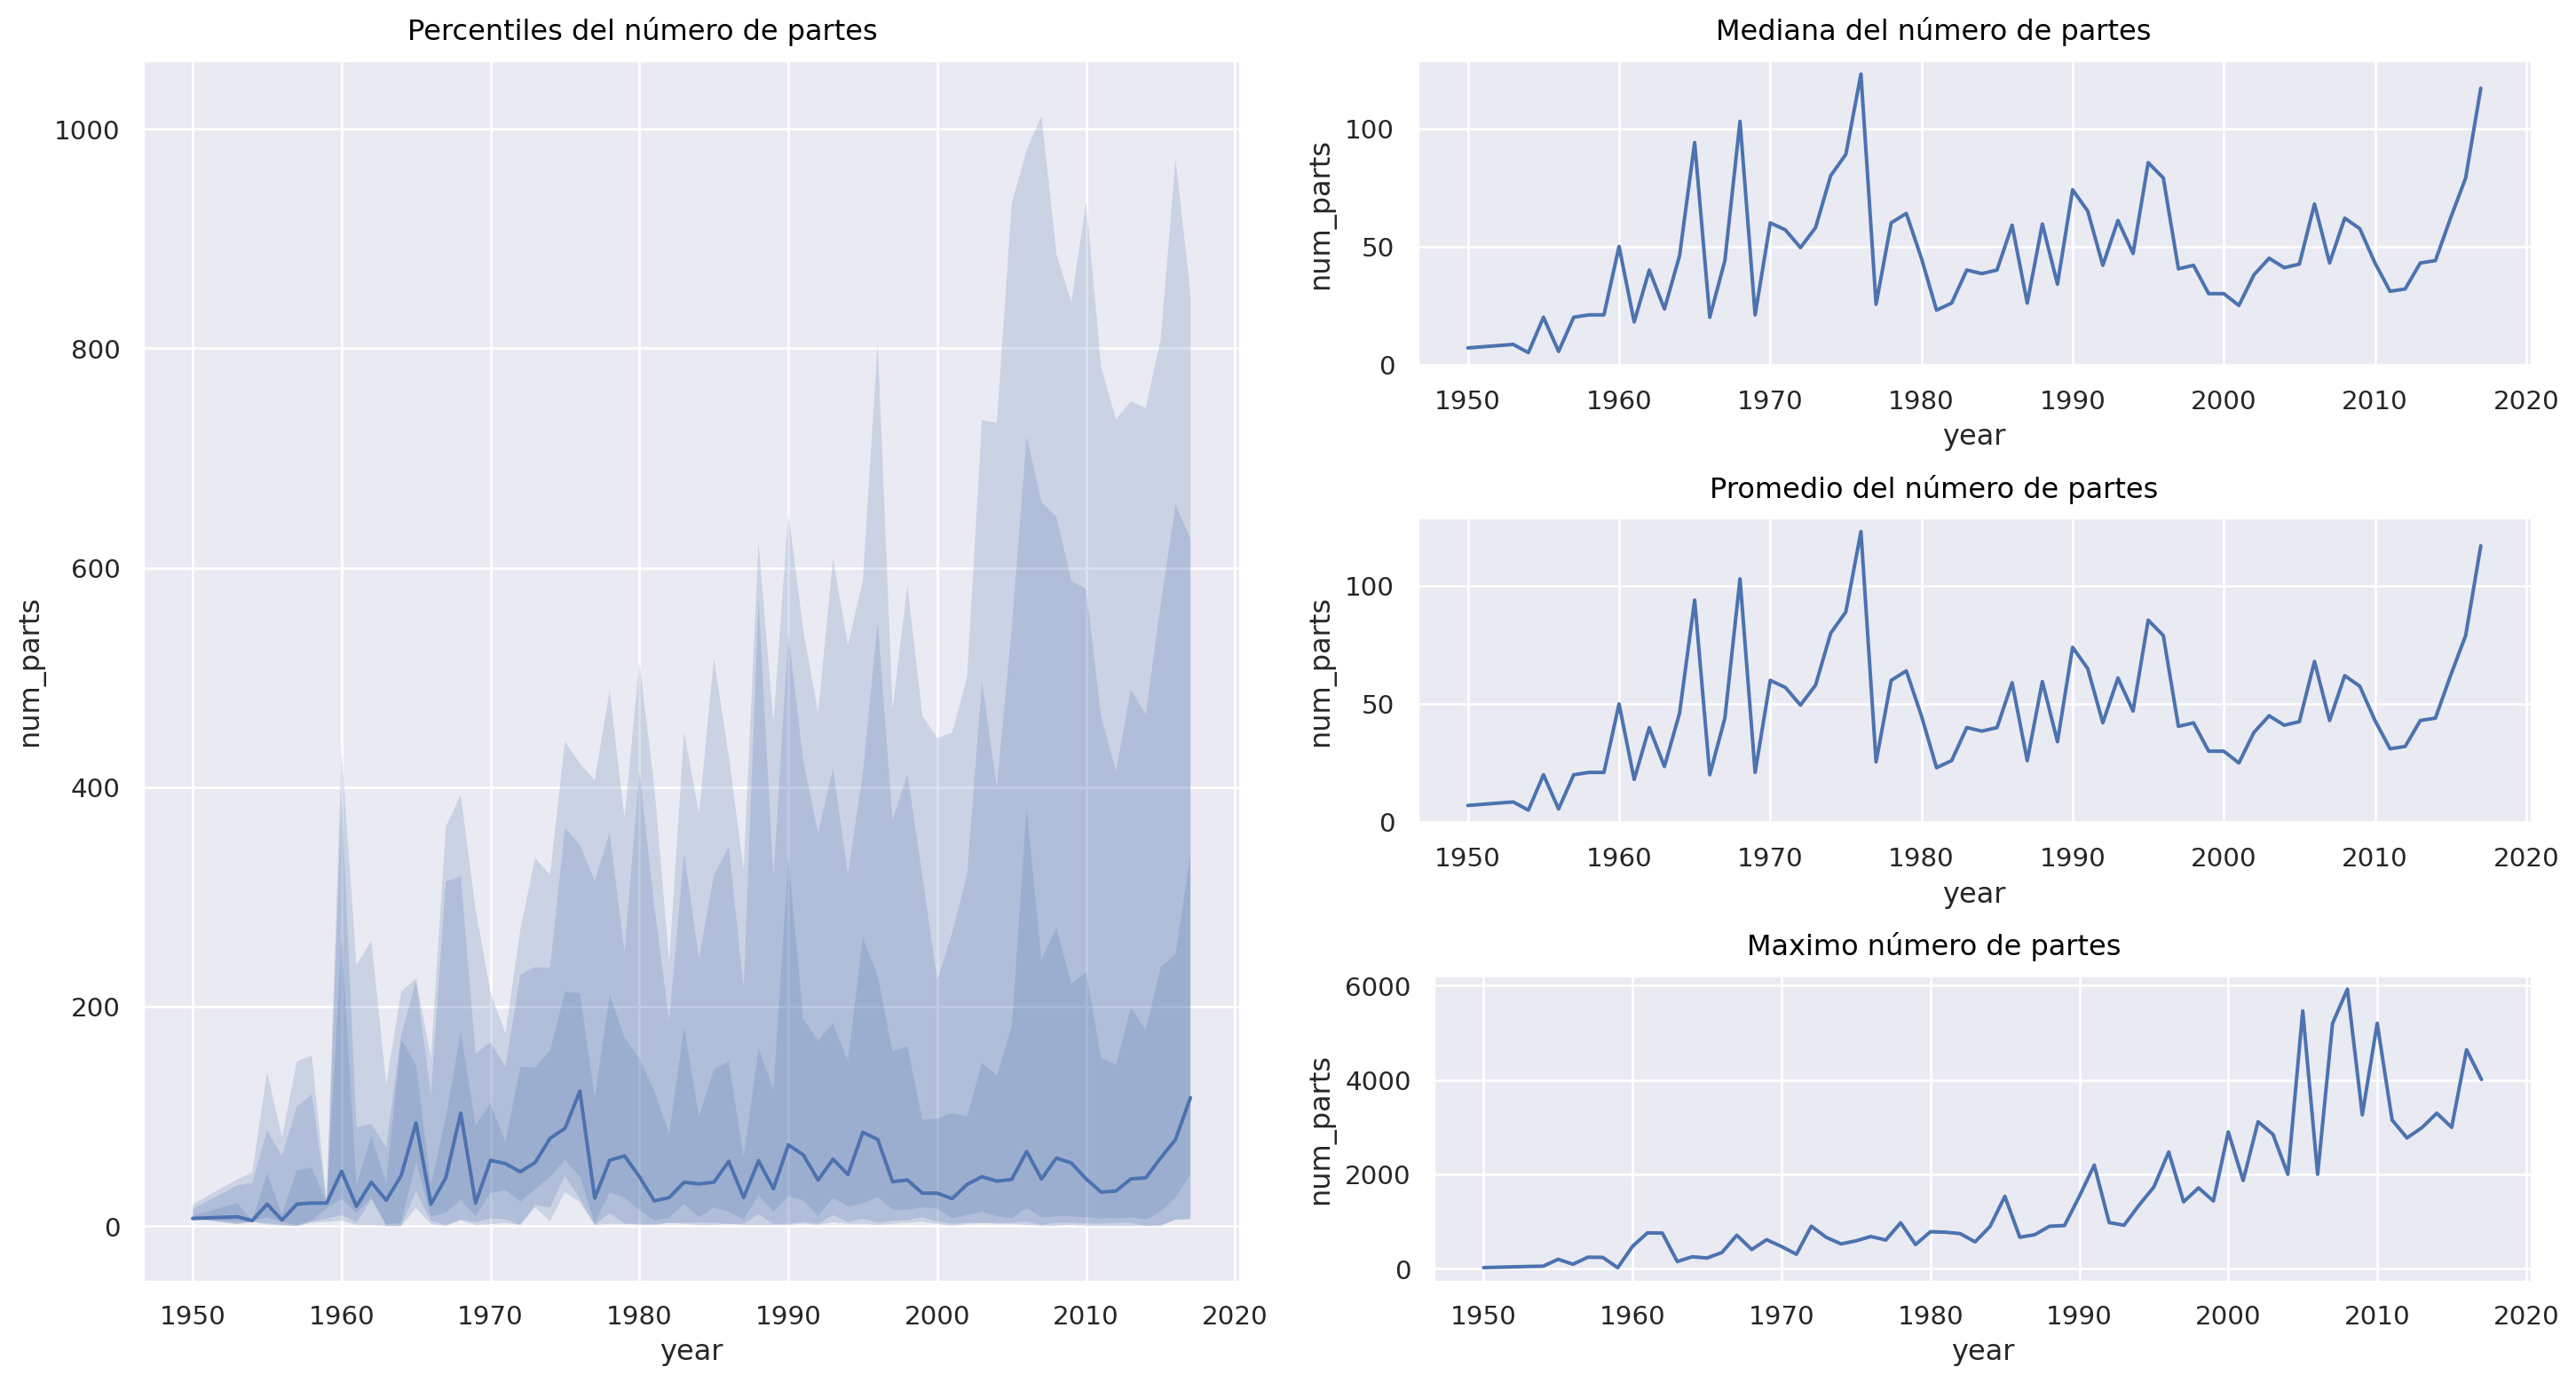

In [75]:
fig = figure.Figure(figsize=(15, 8), dpi=100, layout="constrained")
sfig1, sfig2 = fig.subfigures(1, 2)
ssfig2 = sfig2.subfigures(3, 1)
sfig1.suptitle("Percentiles del número de partes")
ssfig2[0].suptitle("Mediana del número de partes")
ssfig2[1].suptitle("Promedio del número de partes")
ssfig2[2].suptitle("Maximo número de partes")
p = so.Plot(sets_df, x="year", y="num_parts")
p.add(so.Line(), so.Agg("mean")).plot()
for tail in [50, 25, 10, 5]:
    p = p.add(so.Band(), so.Perc([tail, 100 - tail]))
p = p.add(so.Line(), so.Agg("median"))
p.on(sfig1).plot()
p = so.Plot(sets_df, x="year", y="num_parts")
p.on(ssfig2[0]).add(so.Line(), so.Agg("median")).plot()
p.on(ssfig2[1]).add(so.Line(), so.Agg("median")).plot()
p.on(ssfig2[2]).add(so.Line(), so.Agg("max")).plot()

### Asociación entre colores y temáticas

In [29]:
print("Cantidad de temáticas:", len(themes_df))
print("Cantidad de temáticas generales:", len(themes_df["theme_parent_id"].unique()))
print("Cantidad de colores:", len(colors_df))

theme_color_df = pd.merge(inventories_df, sets_df, on="set_num")
theme_color_df = pd.merge(inventory_parts_df, theme_color_df, on="inventory_id")
theme_color_df.head(2)

Cantidad de temáticas: 614
Cantidad de temáticas generales: 79
Cantidad de colores: 135


,inventory_id,part_num,color_id,quantity,is_spare,color_name,color_rgb,color_is_trans,inventory_version,set_num,name,year,theme_id,num_parts,theme_name,theme_parent_id
0,1,48379c01,72,1,False,Dark Bluish Gray,6C6E68,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0
1,1,48395,7,1,False,Light Gray,9BA19D,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0


In [13]:
theme_color_corr = theme_color_df.groupby(["color_rgb", "theme_name"]).size().reset_index().pivot(columns="color_rgb", index="theme_name", values=0)
theme_color_corr.fillna(value=0, inplace=True)
theme_color_corr = theme_color_corr.div(theme_color_corr.sum(axis=1), axis=0)
theme_color_corr.head(2)


color_rgb,000000,0020A0,0033B2,0055BF,008F9B,05131D,078BC9,0A3463,184632,1B2A34,...,FBE696,FC97AC,FCFCFC,FE8A18,FEBABD,FECCCF,FF800D,FFA70B,FFF03A,FFFFFF
theme_name,,,,,,,,,,,,,,,,,,,,,
12V,0.0,0.0,0.0,0.074574,0.0,0.344686,0.0,0.0,0.0,0.0,...,0.0,0.0,0.032883,0.0,0.0,0.0,0.0,0.0,0.0,0.069877
4 Juniors,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


IntProgress(value=0, max=379)

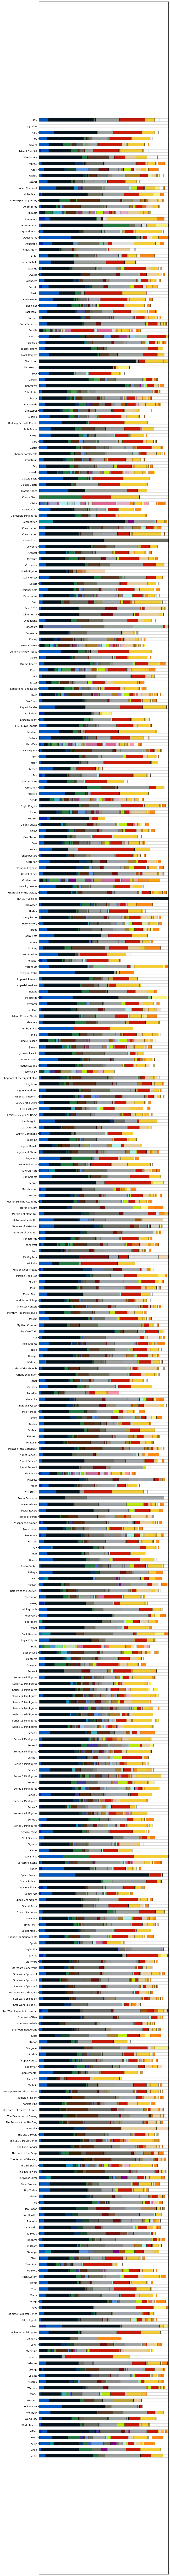

In [28]:
fig, ax = plt.subplots(figsize=(10, 150))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, 1)

progress_bar = IntProgress(min=0, max=len(theme_color_corr))  # instantiate the bar
display(progress_bar)  # display the bar

for index, color_data in theme_color_corr.iterrows():
    bar_sum = 0
    for color, value in color_data.items():
        ax.barh(
            index,
            width=value,
            height=0.5,
            left=bar_sum,
            color="#" + color,
            align="center",
            edgecolor="black",
            linewidth=0.2,
        )
        bar_sum += value
    progress_bar.value += 1
fig.tight_layout()

### Sets que contienen las piezas más raras

Transformación de variable *part*: Asignación de un valor de "rareza" dada la cantidad de piezas iguales en el conjunto de los inventarios registrados.

In [12]:
def assign_part_rarity(part_info):
    """Assign part rarity based on parts dataframe row"""
    return inventory_parts_df[
        inventory_parts_df["part_num"] == part_info.part_num
    ].quantity.sum()


# Assign rarity score to each part
TOTAL_PARTS_QUANTITY = inventory_parts_df.quantity.sum()
# parts_df["part_rarity"] = parts_df.apply(assign_part_rarity, axis="columns")

progress_bar = IntProgress(min=0, max=len(parts_df))  # instantiate the bar
display(progress_bar)  # display the bar

parts_df["part_quantity"] = 0
for index, part_info in parts_df.iterrows():
    parts_df.loc[index, "part_quantity"] = assign_part_rarity(part_info)
    progress_bar.value += 1

IntProgress(value=0, max=25993)

580251


,inventory_id,part_num,color_id,quantity,is_spare,color_name,color_rgb,color_is_trans
0,1,48379c01,72,1,False,Dark Bluish Gray,6C6E68,False
1,1,48395,7,1,False,Light Gray,9BA19D,False
2,1,mcsport6,25,1,False,Orange,FE8A18,False
3,1,paddle,0,1,False,Black,05131D,False
4,3,11816pr0005,78,1,False,Light Flesh,F6D7B3,False


In [17]:
print(
    "Cantidad de partes únicas en el conjunto de inventarios registrados:",
    len(parts_df[parts_df["part_quantity"] == 1]),
)
parts_df.head()

Cantidad de partes únicas en el conjunto de inventarios registrados: 10389


,part_num,name,part_cat_id,part_quantity
0,0687b1,Set 0687 Activity Booklet 1,17,1
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1,1


Se puede observar que existe una gran cantidad de partes que son únicas en el conjunto de inventarios registrados.

Se analizará los sets que a lo largo de los años contienen ese subconjunto de partes.

In [36]:
# Dataframe composition
rarity_df = pd.merge(inventories_df, sets_df, on="set_num")
rarity_df = pd.merge(inventory_parts_df, rarity_df, on="inventory_id")
rarity_df = pd.merge(
    parts_df.rename(columns={"name": "part_name"}), rarity_df, on="part_num"
)

Se aplica una discretización diferente de los años para tener un conjunto más reducido de datos a analizar. En este caso en lugar de analizar años individuales se analizan décadas.

In [47]:
# Year discretization in decades
DECADES_INITIAL_YEAR = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
DECADES_LABELS = ["50s", "60s", "70s", "80s", "90s", "00s", "10s"]
rarity_df["year_binned"] = pd.cut(
    rarity_df["year"], bins=DECADES_INITIAL_YEAR, right=False, labels=DECADES_LABELS
)
rarity_df.sort_values(by=["part_quantity"], inplace=True, ascending=True)
rarity_df = rarity_df[rarity_df["part_quantity"] == 1]
print("Cantidad de observaciones a analizar:", len(rarity_df))
rarity_df.head()

Cantidad de observaciones a analizar: 10389


,part_num,part_name,part_cat_id,part_quantity,inventory_id,color_id,quantity,is_spare,color_name,color_rgb,color_is_trans,inventory_version,set_num,name,year,theme_id,num_parts,year_binned
20895,18922pr0001,Brick Special 8 x 16 with 1 x 4 Indentations a...,5,1,3485,84,1,False,Medium Dark Flesh,CC702A,False,1,10686-1,Family House,2015,591,226,10s
278297,3626bpr0954,"Minifig Head Beard Brown Bushy, Moustache, Whi...",13,1,2085,14,1,False,Yellow,F2CD37,False,1,8833-2,Conquistador - Complete Set,2012,543,8,10s
278321,3626bpr1029,Minifig Head Female Glasses with White Ski Gog...,13,1,182,14,1,False,Yellow,F2CD37,False,1,8833-7,Downhill Skier - Complete Set,2012,543,9,10s
278288,3626bpr0946,Minifig Head with Green War Paint Print [Block...,13,1,14188,14,1,False,Yellow,F2CD37,False,1,8831-2,Aztec Warrior - Complete Set,2012,542,7,10s
54399,25275,DUPLO OVAL 2X4X2 NO 13,24,1,8925,14,1,False,Yellow,F2CD37,False,1,10814-1,Tow Truck Set,2016,504,26,10s


In [66]:
more_rare_sets = []
for decade in DECADES_LABELS:
    more_raryty_by_decade = rarity_df[
        rarity_df["year_binned"] == decade
    ].set_num.value_counts()
    for rare_set_num, rare_set_score in more_raryty_by_decade[
        more_raryty_by_decade == more_raryty_by_decade.iloc[0]
    ].items():
        print(
            f"{decade}: set {rare_set_num} tiene {rare_set_score} partes ques son únicas en el conjunto de inventarios registrados"
        )
        more_rare_sets.append(rare_set_num)

sets_df[sets_df["set_num"].isin(more_rare_sets)].sort_values(by=["year"])

50s: set 226-1 tiene 6 partes ques son únicas en el conjunto de inventarios registrados
60s: set 988-1 tiene 21 partes ques son únicas en el conjunto de inventarios registrados
70s: set 522-1 tiene 6 partes ques son únicas en el conjunto de inventarios registrados
80s: set 1033-1 tiene 20 partes ques son únicas en el conjunto de inventarios registrados
80s: set 1031-1 tiene 20 partes ques son únicas en el conjunto de inventarios registrados
90s: set 9631-1 tiene 24 partes ques son únicas en el conjunto de inventarios registrados
00s: set 7419-1 tiene 47 partes ques son únicas en el conjunto de inventarios registrados
10s: set 6051-1 tiene 33 partes ques son únicas en el conjunto de inventarios registrados


,set_num,name,year,theme_id,num_parts,theme_name,theme_parent_id
1646,226-1,8 Named Beams,1958,371,8,Supplemental,365.0
10959,988-1,Alphabet Bricks,1969,371,45,Supplemental,365.0
5066,522-1,Police Station,1977,504,26,Duplo,NaN
246,1031-1,Building Cards - 1030,1983,532,20,Supplemental,529.0
248,1033-1,Building Cards - 1032,1985,532,20,Supplemental,529.0
10708,9631-1,Simple and Motorized Machines Activity Pack,1997,529,24,Technic,507.0
7937,7419-1,Dragon Fortress,2003,300,741,Orient Expedition,296.0
5797,6051-1,Play with Letters,2011,504,62,Duplo,NaN


Los siguientes sets poseen la mayor cantidad de piezas raras en la década en que fueron publicados:

| 1950 - 1960 | 1960 - 1970 | 1970 - 1980 | 1980 - 1990 | 1990 - 2000 | 2000 - 2010 | 2010 - 2020 |
|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| 226-1 - 8 Named Beams | 10959 - Alphabet Bricks | 5066 - Police Station | 246/248 - Building Cards - 1030/1032 | 10708 - Simple and Motorized Machines Activity Pack | 7937 - Dragon Fortress | 5797 - Play with Letters |
| ![8 Named Beams](./imgs/226-1.jpg) | ![Alphabet Bricks](./imgs/988-1.jpg) | ![Police Station](./imgs/522-1.jpg) | ![Building Cards](./imgs/1031-1.jpg) | ![Simple and Motorized Machines Activity Pack](./imgs/9631-1.jpg) | ![Dragon Fortress](./imgs/7419-1.jpg) | ![Play with Letters](./imgs/6051-1.jpg) |

El set con mayor cantidad de piezas raras es el [Dragon Fortress 7419-1](https://www.google.com/url?sa=i&url=http%3A%2F%2Ffr.bricker.info%2Fsets%2F7419%2F&psig=AOvVaw3B2X1l2b3Z4rgWUr8wp0I5&ust=1728846469224000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCJjuq5LFiYkDFQAAAAAdAAAAABAI)

![Dragon Fortress 7419-1](./imgs/7419-1.jpg)

### Evolución de los colores de los sets a lo largo el tiempo

In [31]:
year_color_corr = theme_color_df.groupby(["color_rgb", "year"]).size().reset_index().pivot(columns="color_rgb", index="year", values=0)
year_color_corr.fillna(value=0, inplace=True)
year_color_corr = year_color_corr.div(year_color_corr.sum(axis=1), axis=0)
year_color_corr.head(2)

color_rgb,000000,0020A0,0033B2,0055BF,008F9B,05131D,078BC9,0A3463,184632,1B2A34,...,FBE696,FC97AC,FCFCFC,FE8A18,FEBABD,FECCCF,FF800D,FFA70B,FFF03A,FFFFFF
year,,,,,,,,,,,,,,,,,,,,,
1950,0.0,0.0,0.0,0.130435,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.043478,0.0,0.0,0.0,0.0,0.043478,0.0,0.173913
1953,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.333333


IntProgress(value=0, max=66)

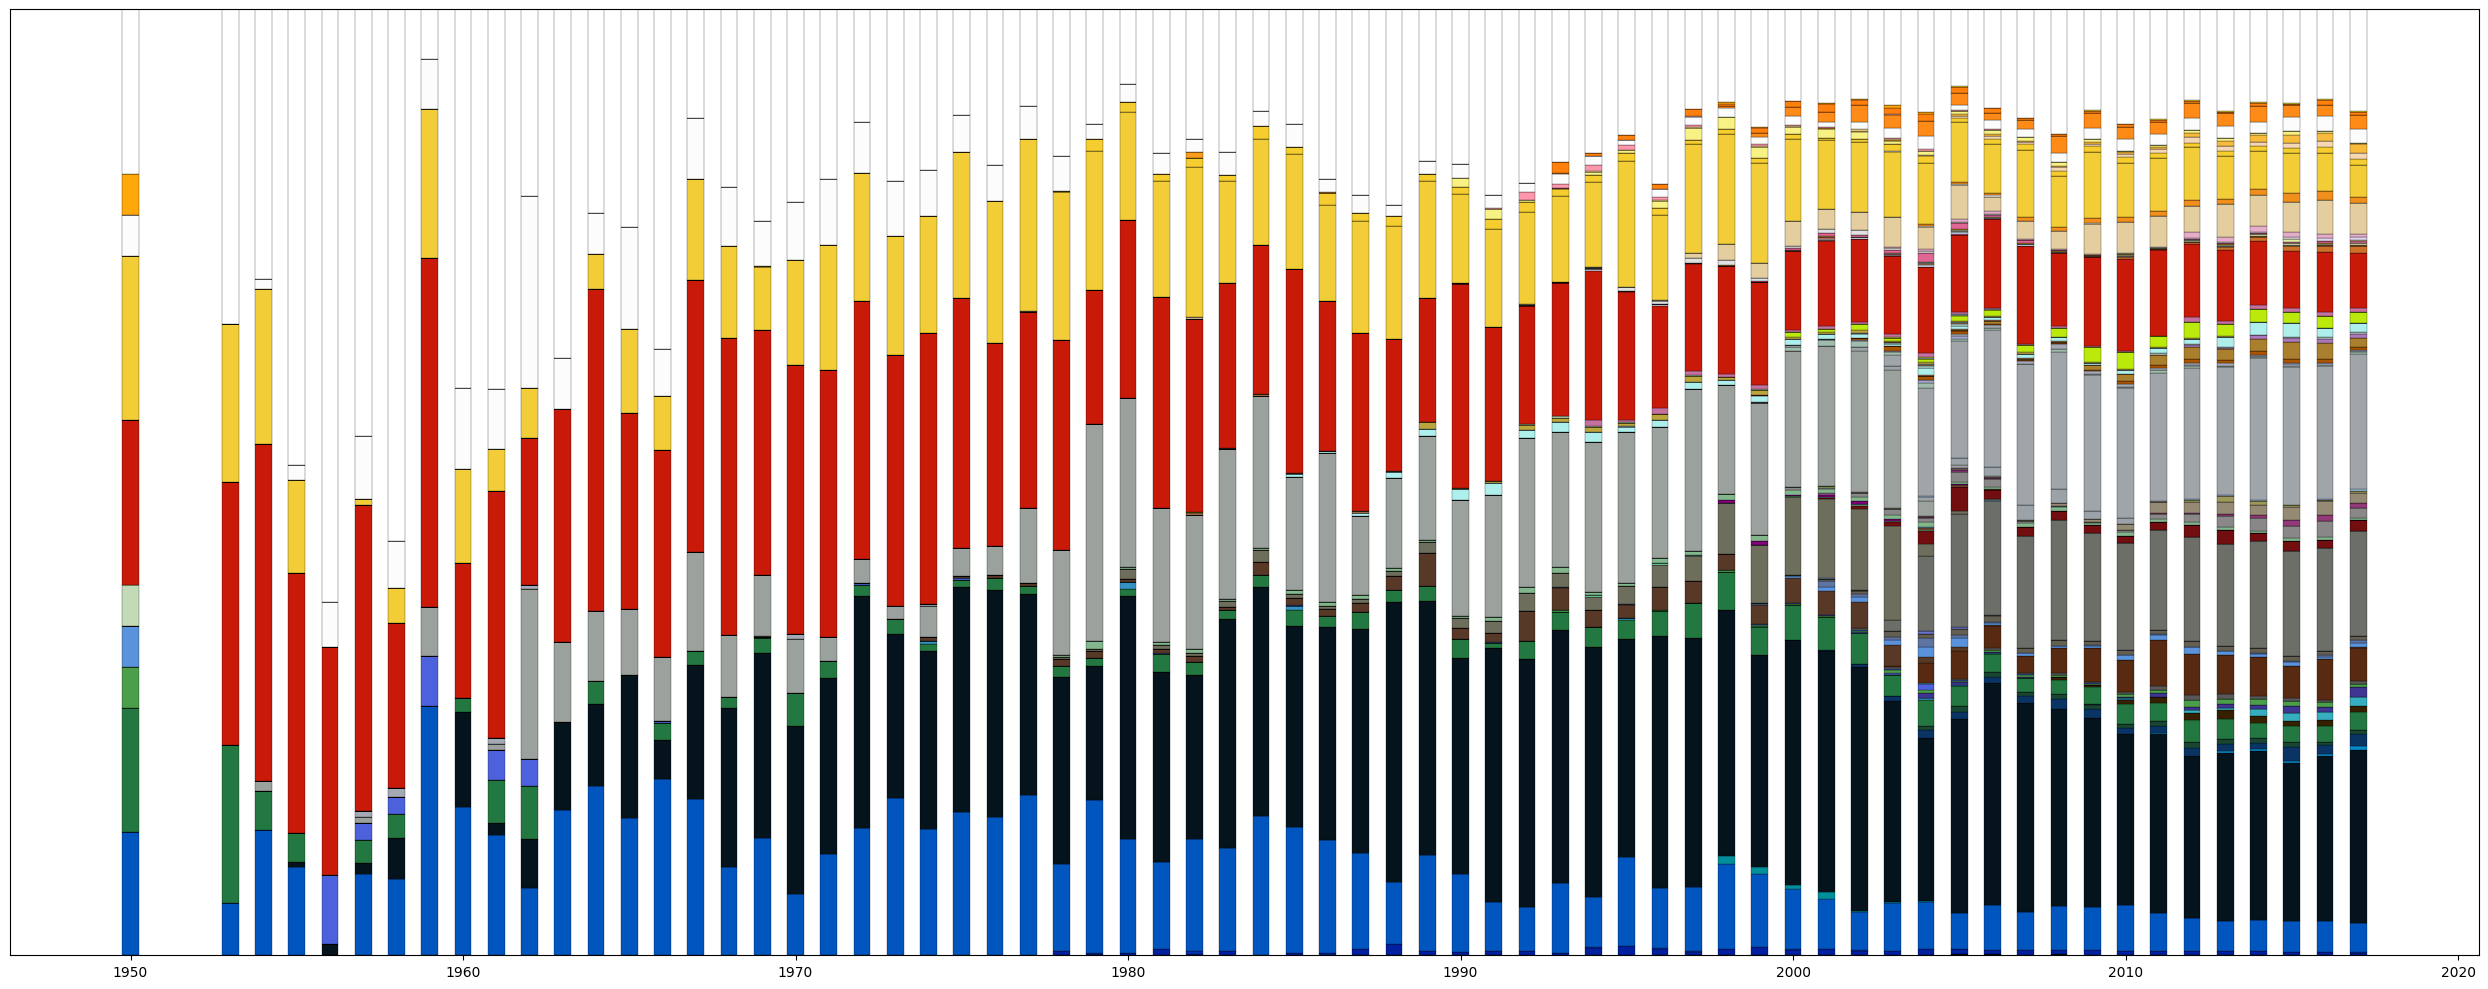

In [34]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.yaxis.set_visible(False)
ax.set_ylim(0, 1)

progress_bar = IntProgress(min=0, max=len(year_color_corr))  # instantiate the bar
display(progress_bar)  # display the bar

for index, color_data in year_color_corr.iterrows():
    bar_sum = 0
    for color, value in color_data.items():
        ax.bar(
            index,
            width=0.5,
            height=value,
            bottom=bar_sum,
            color="#" + color,
            align="center",
            edgecolor="black",
            linewidth=0.2,
        )
        bar_sum += value
    progress_bar.value += 1
fig.tight_layout()